In [2]:
import numpy as np
import QAOA_class as Q
import networkx as nx
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import csv
import math
warnings.filterwarnings('ignore')

In [3]:
def tensor(k):
    t = k[0]
    i = 1
    
    while i < len(k) :
        t = np.kron(t,k[i])
        i+=1
    return t


def Graph_to_Hamiltonian(G,n): 
    H = np.zeros((2**n), dtype = 'float64') 
    Z = np.array([1,-1],dtype = 'float64')
    
    for i in range(n):
        j = i+1
        while j<n:
            k = [[1,1]]*n
            k = np.array(k,dtype = 'float64')
                
            if G[i][j] !=0:
                k[i] = Z
                k[j] = Z
                H+= tensor(k)*G[i][j]
                    
            j+=1
        
    return H

In [4]:
def get_Hamiltonian(G):
    graph_array = nx.to_numpy_array(G)
    
    H = Graph_to_Hamiltonian(graph_array, G.number_of_nodes())
    
    return H
    

In [5]:
def depth_scaling(H, p_c_start=1, p_c_stop=15):
#     file_dump(["Energy achieved", "Minimum Energy", "Error", "Overlap", "Degenaracy", "Depth", "seed", "Exec. Time"], f_name1)
    p_c = p_c_start
    check = False
    epsilon = 0.1
    seeds = 100
    p_star = None
    
    while not check and p_c <= p_c_stop:
        
        Q1 = Q.QAOA(p_c,H)
        seed_result = []
        
        for s in range(1,seeds +1):
            Q1.run_heuristic_LW()
            temp = [Q1.q_energy, Q1.min, Q1.q_error, Q1.olap, Q1.deg, p_c, s, Q1.exe_time]
#             file_dump(temp,f_name1)
            seed_result.append(temp)
            temp = list(Q1.opt_angles)
            temp.append(s)
            temp.append(p_c)
#             file_dump(temp,f_name2)
        
        
        seed_result = np.asarray(seed_result)
#         print(seed_result)
        idx = np.argmin(seed_result[:,2])
        best = seed_result[idx]
        
        if best[2]<=epsilon:
            # print("Q1.err",Q1.q_error)
            # print("seed res",seed_result.shape,seed_result[idx])
            check = True
        else:
            p_c+= 1
    
    return best, p_c

In [6]:
nqubits = 6

In [34]:
G = nx.cycle_graph(nqubits)

In [7]:
G = nx.Graph()
nodes = [0, 1, 2, 3]
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (1, 3)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [7]:
G = nx.random_regular_graph(3,nqubits)

array([ 9.,  3.,  3.,  1.,  3.,  1., -3., -1.,  3., -3.,  1., -1.,  1.,
       -1., -1.,  1.,  3., -3.,  1., -1.,  1., -1., -1.,  1., -3., -9.,
       -1., -3., -1., -3.,  1.,  3.,  3.,  1., -3., -1., -3., -1., -9.,
       -3.,  1., -1., -1.,  1., -1.,  1., -3.,  3.,  1., -1., -1.,  1.,
       -1.,  1., -3.,  3., -1., -3.,  1.,  3.,  1.,  3.,  3.,  9.])

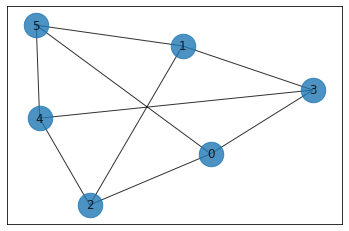

In [8]:
nx.draw_networkx(G, node_size=600, alpha=0.8)
H = get_Hamiltonian(G)
H

In [9]:
_, p_star = depth_scaling(H)
p_star

4